In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/insurance_data.csv')

In [3]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


# **EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [5]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [6]:
df.isnull().sum().sum()

52

In [7]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [8]:
df.duplicated().sum()

0

In [9]:
col_list = list(df.columns)
col_list

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [10]:
for x in col_list:
  if df[x].dtype == 'object':
    df[x].fillna(df[x].mode()[0],inplace=True)
  else:
    df[x].fillna(df[x].mean(),inplace=True)

<ipython-input-10-7e2554b2624c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mean(),inplace=True)
<ipython-input-10-7e2554b2624c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [11]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


# **Outliers** **Detection**

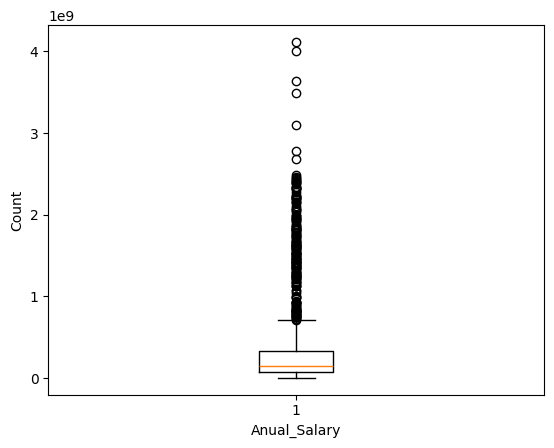

In [12]:
plt.boxplot(df['Anual_Salary'])
plt.xlabel('Anual_Salary')
plt.ylabel('Count')
plt.show()

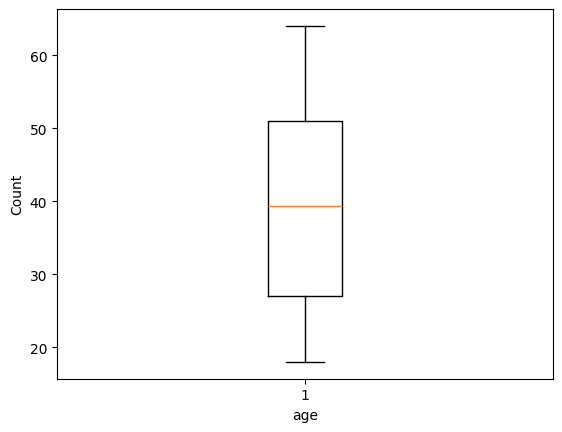

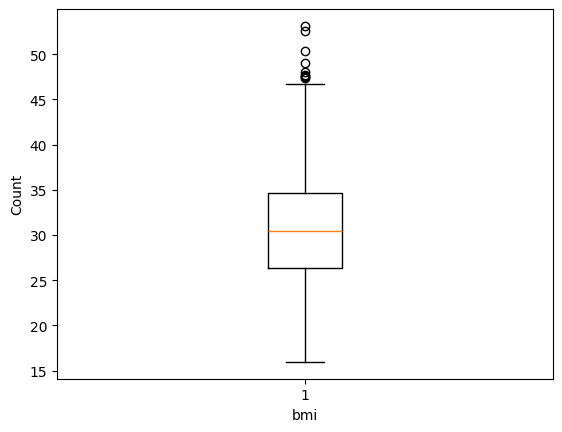

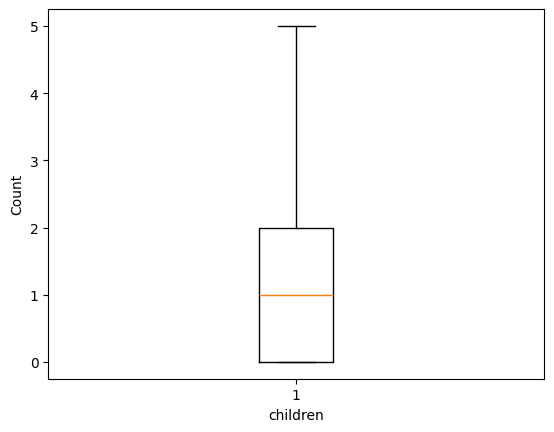

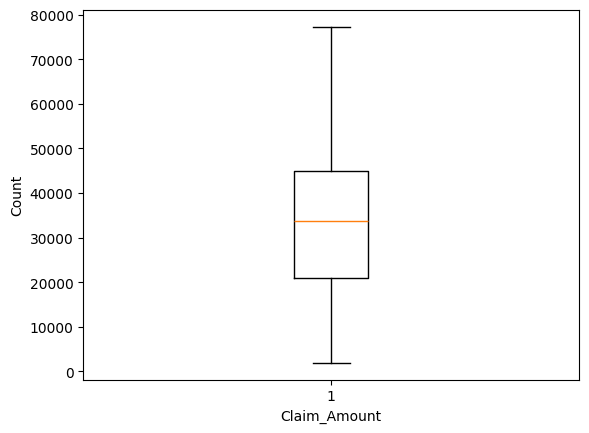

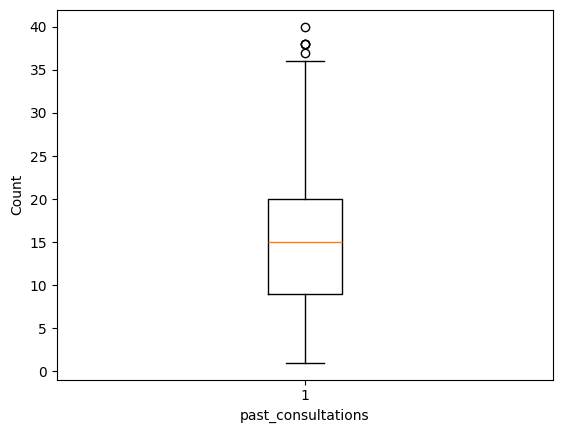

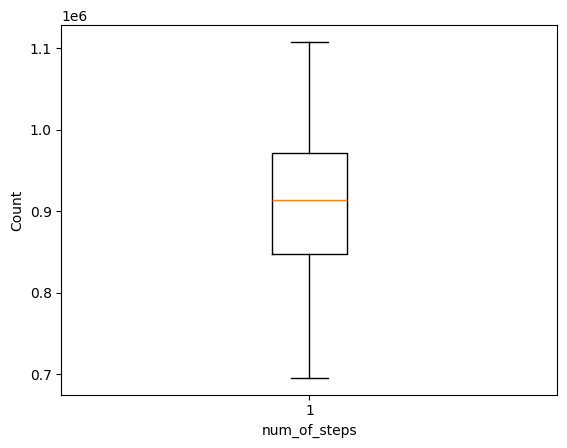

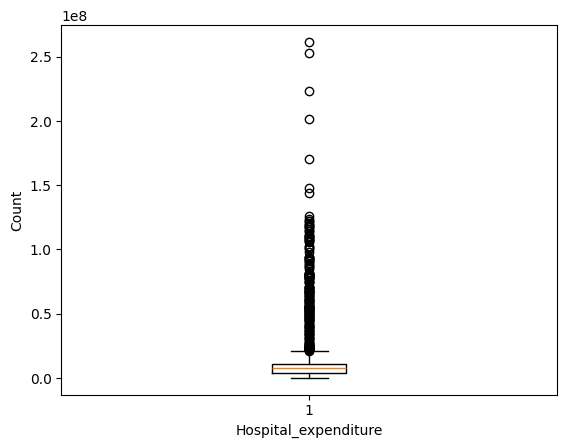

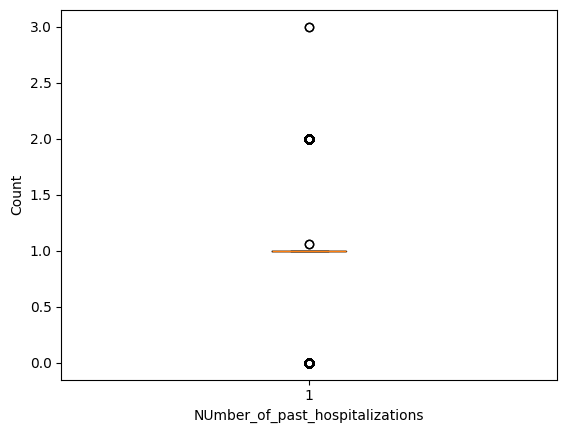

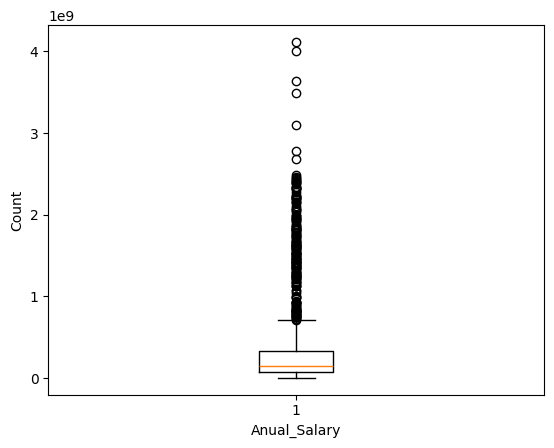

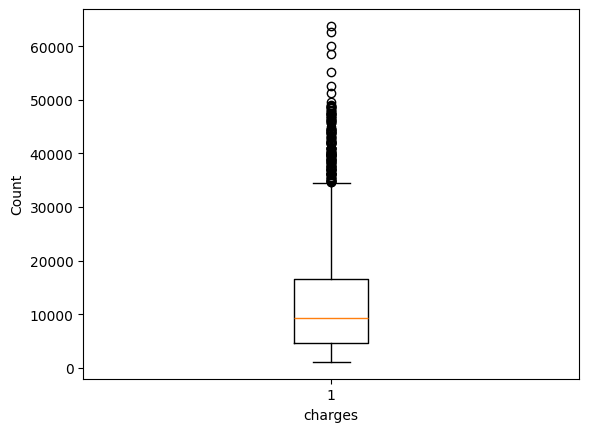

In [13]:
for x in col_list:
  if df[x].dtype == 'object':
    continue
  plt.boxplot(df[x])
  plt.xlabel(x)
  plt.ylabel('Count')
  plt.show()

**Now we have detected that we have outliers in our dataset. Now we need to deal with them(remove them)**

In [14]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound,upper_bound)
df = df[(df.bmi >= lower_bound) & (df.bmi <= upper_bound)]

13.803125000000003 47.168124999999996


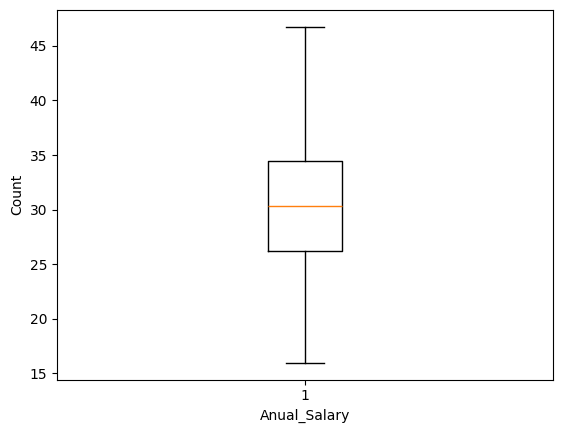

In [15]:
plt.boxplot(df['bmi'])
plt.xlabel('Anual_Salary')
plt.ylabel('Count')
plt.show()

In [16]:
for x in col_list:
  if df[x].dtype == 'object' or x == 'charges':
    continue

  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)

  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  df = df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]

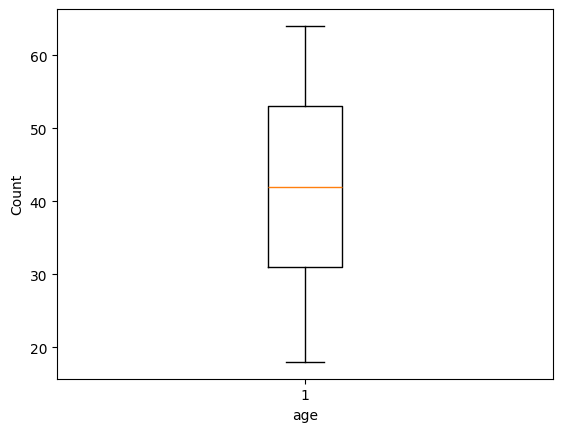

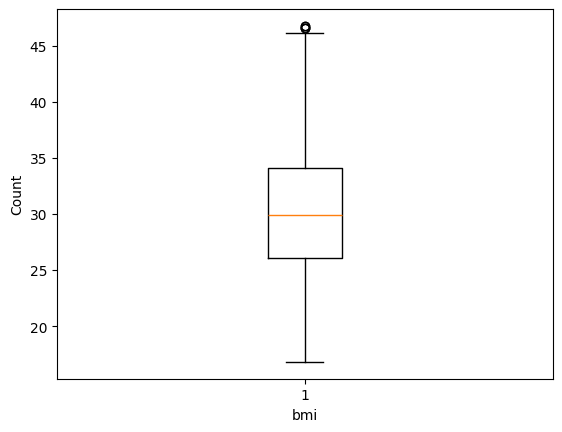

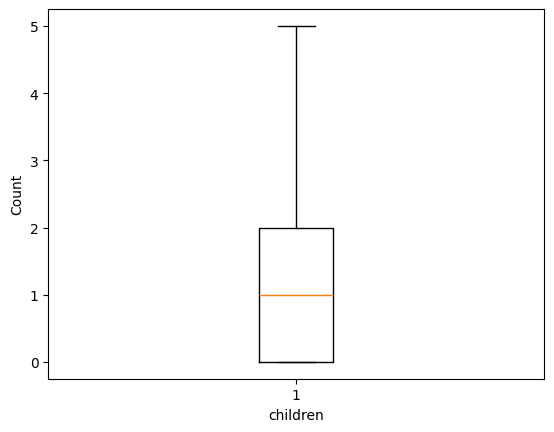

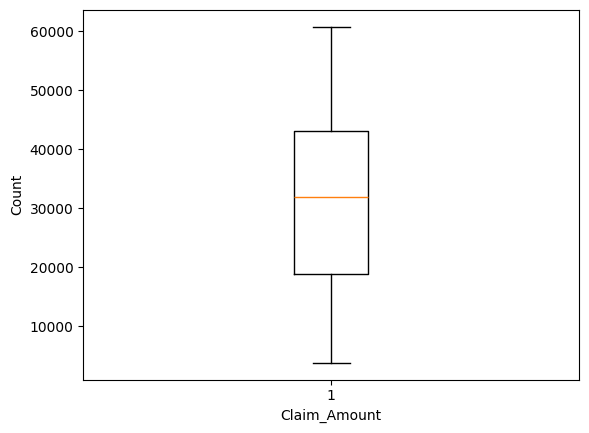

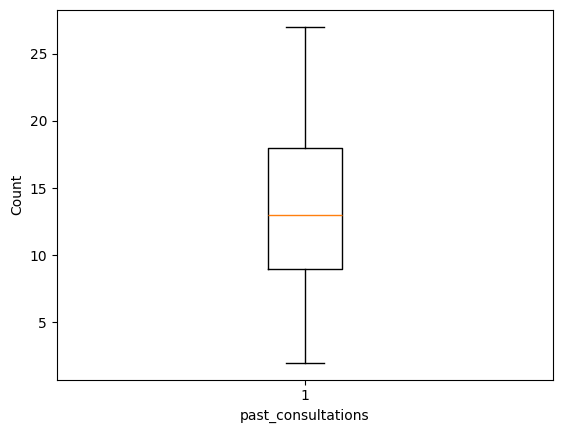

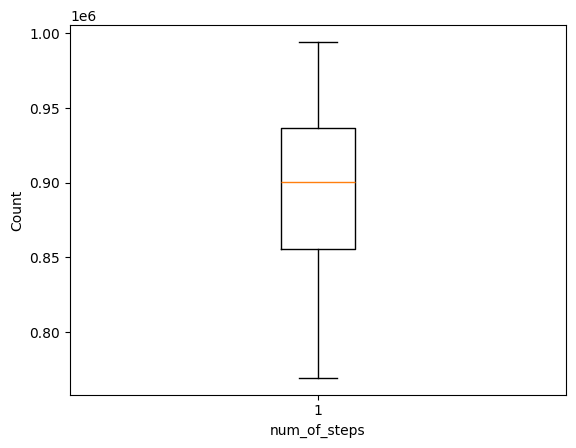

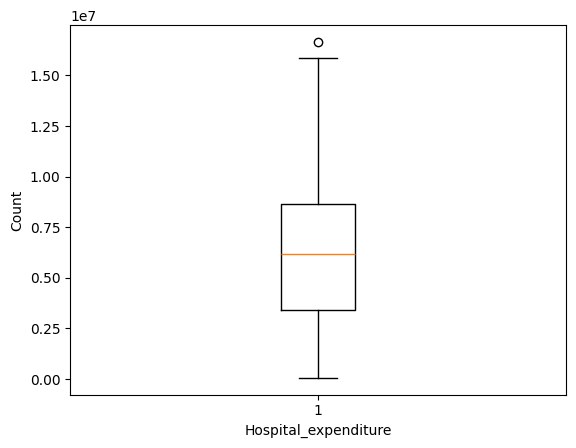

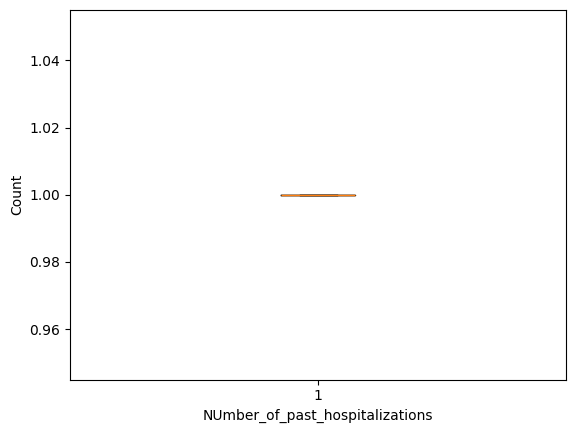

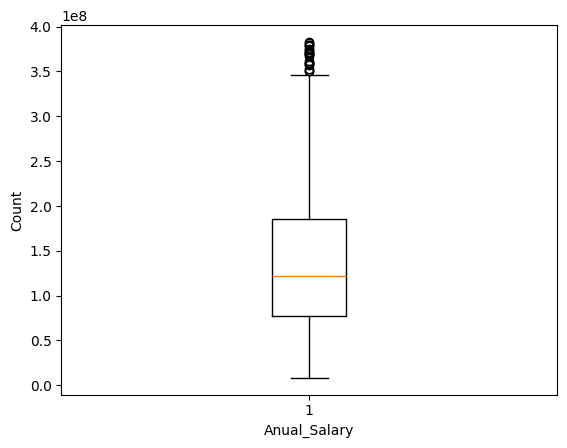

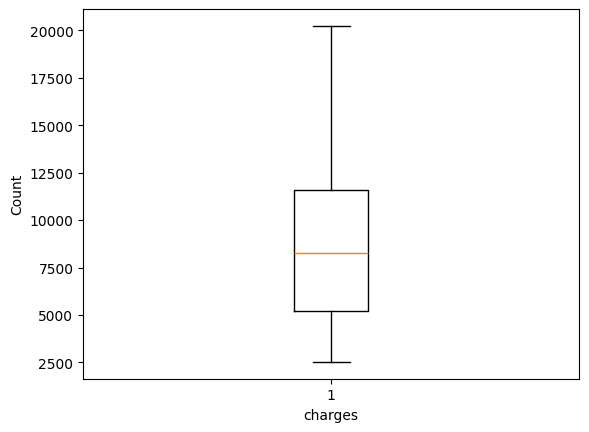

In [17]:
for x in col_list:
  if df[x].dtypes == 'object':
    continue
  plt.boxplot(df[x])
  plt.xlabel(x)
  plt.ylabel('Count')
  plt.show()

In [18]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
col_list

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [21]:
for x in col_list:
  if df[x].dtype == 'object':
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])

In [22]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1,2523.16950
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1,2527.81865
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1,2534.39375
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2,2566.47070
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2,19350.36890
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0,19798.05455


# Model Building

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
x = df.iloc[:,:12]
y = df.iloc[:,-1]

In [25]:
x # independent columns

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0


In [26]:
y #dependent columns

,charges
151,2523.16950
152,2527.81865
153,2534.39375
154,2566.47070
155,2585.26900
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75)


In [28]:
x_train   #Training data (questions)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
882,60.0,0,30.665112,0.0,0,35152.811420,15.0,941149.00000,1.030845e+07,1.0,1.913545e+08,2
872,54.0,0,24.605000,3.0,0,39676.119160,15.0,942200.00000,4.955162e+06,1.0,1.976492e+08,1
284,30.0,1,27.645000,1.0,0,8143.064214,17.0,910004.69588,2.890746e+06,1.0,3.361309e+07,0
829,58.0,0,22.770000,0.0,0,44631.376070,5.0,953469.00000,2.974744e+06,1.0,1.904981e+08,2
1002,21.0,1,31.020000,0.0,0,42441.116990,20.0,968040.00000,1.129121e+07,1.0,3.239201e+08,2
...,...,...,...,...,...,...,...,...,...,...,...,...
421,35.0,1,34.320000,3.0,0,49955.291770,18.0,872090.00000,5.573758e+06,1.0,6.428983e+07,2
206,25.0,0,23.465000,0.0,0,30797.195830,19.0,810771.00000,2.708064e+06,1.0,1.556612e+07,0
950,59.0,0,32.100000,3.0,0,10741.271460,24.0,945540.00000,1.132432e+07,1.0,2.185752e+08,3
666,49.0,1,37.510000,2.0,0,30580.674140,11.0,930564.00000,2.848439e+06,1.0,1.730071e+08,2


In [29]:
y_train #Training data answers..

,charges
882,12629.89670
872,12479.70895
284,4237.12655
829,11833.78230
1002,16586.49771
...,...
421,5934.37980
206,3206.49135
950,14007.22200
666,9304.70190


In [30]:
x_test    #Testing data. after building the model i will test my model with this data.

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
640,47.0,0,29.545,1.0,0,46712.69090,17.0,917642.0,9715568.557,1.0,1.572821e+08,1
1021,25.0,0,41.325,0.0,0,17100.29000,26.0,970038.0,8933071.597,1.0,3.353376e+08,0
774,48.0,0,41.230,4.0,0,45345.77466,11.0,927845.0,9955030.628,1.0,1.977029e+08,1
366,34.0,1,42.130,2.0,0,29195.05506,15.0,843145.0,7501613.410,1.0,1.084831e+08,2
536,39.0,0,34.100,3.0,0,33660.78544,13.0,890593.0,2746996.417,1.0,8.752788e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
383,30.0,0,30.900,3.0,0,33069.53605,10.0,852551.0,6977037.088,1.0,1.212373e+08,3
1013,19.0,1,29.070,0.0,1,58901.21861,16.0,975702.0,8830423.241,1.0,3.304683e+08,1
310,31.0,1,38.390,2.0,0,13271.90932,7.0,839659.0,5738723.937,1.0,8.029886e+07,2
841,58.0,1,30.305,0.0,0,31405.79359,12.0,939497.0,9380140.579,1.0,2.118739e+08,0


In [31]:
y_test

,charges
640,8930.93455
1021,17878.90068
774,11033.66170
366,5124.18870
536,7418.52200
...,...
383,5325.65100
1013,17352.68030
310,4463.20510
841,11938.25595


In [32]:
linear_model = LinearRegression()

In [33]:
linear_model.fit(x_train,y_train)

LinearRegression()

# Now we need to test the data to check what values my model can predict

In [34]:
model_predicted = linear_model.predict(x_test)

In [35]:
  model_predicted

array([10163.52545093, 15014.47545804, 11348.39512286,  5439.76353326,
        7383.95769329, 11091.62565788,  3796.97182228, 11264.74049214,
        9279.93506594, 10788.36221814, 12996.60438161, 13946.79968055,
        6575.43901321, 11295.20265087,  7344.95811233,  9610.67269404,
        4755.40936471,  2624.49687356,  2666.02834536,  6723.76427716,
       16902.67492213,  5192.33876726, 15796.3855093 ,  7964.2108417 ,
       11668.60447739, 13688.56397738,  9790.91528959, 10196.4178658 ,
        2031.62291694,  9372.77625143,  6571.97587477,  4481.17621467,
        6716.04094664,  5005.74155542,  6340.59655168,  4557.45719512,
        5580.7835859 ,  8355.7199356 ,  6401.22338093, 11575.2802544 ,
       10620.18747967,  4155.59552121,  6316.52693438,  8778.57543053,
       10015.84342781,  8286.39196896, 10282.2888412 ,  8795.715698  ,
       14991.0763231 ,  4316.11461201, 11696.31143647, 12148.42422502,
       17409.61045652,  9761.65689283, 10004.81400061, 12437.53514179,
      

In [36]:
y_test

,charges
640,8930.93455
1021,17878.90068
774,11033.66170
366,5124.18870
536,7418.52200
...,...
383,5325.65100
1013,17352.68030
310,4463.20510
841,11938.25595


In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mse = mean_squared_error(y_test,model_predicted)

In [39]:
mse

559933.3379164985

In [40]:
rmse = np.sqrt(mse)
rmse

748.2869355511284

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_accuracy = r2_score(y_test,model_predicted)
r2_accuracy*100

96.60806206175668

# Best Fit Line

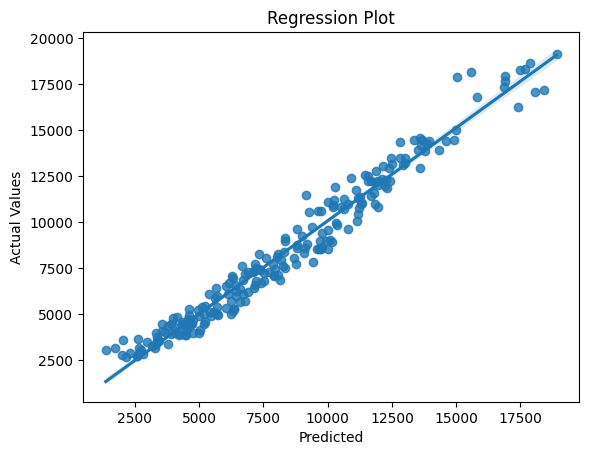

In [43]:
sns.regplot(x=model_predicted,y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual Values')
plt.title('Regression Plot')
plt.show()